In [10]:
# using RF to estimate L.x and F.x (highest correlation & second highest) 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate


In [5]:
dataset=pd.read_csv('/Users/yawei/Documents/SM_ML/combined_data_7_sept.csv')
dataset.columns
dataset=dataset.dropna() 

In [12]:
#                     ## L.x Estimation ##
# Training in Germany, validation in France
dataset_de=dataset[dataset['country']=='Germany']
#dataset[dataset['country']=='France']

In [13]:
# y: target
X_Lx = dataset_de.drop(['grp_tree_species'],axis=1).drop(['country'],axis=1).drop(['species_name'],axis=1).drop(['ID_fine'],axis=1).drop(['ID'],axis=1).drop(['ID_siteplot'],axis=1).drop(['L.x'],axis=1).drop(['ID_site'],axis=1).drop(['plot.x'],axis=1)#[1:]
y_Lx = dataset_de['L.x'].values
X_Lx.columns

Index(['F.x', 'R.x', 'N.x', 'T.x', 'div.x', 'rich.x', 'L.y', 'F.y', 'R.y',
       'N.y', 'T.y', 'div.y', 'rich.y', 'n_nh4', 'n_no3', 'latitude',
       'longitude', 'survey_year', 'code_country', 'sum_canopy', 'mean_temp',
       'mean_summer_temp', 'mean_winter_temp', 'mean_precip', 'n', 'p', 'N.P'],
      dtype='object')

In [14]:
# DO RANDOM FORESTS
max_depth = 500 
X_train, X_test, y_train, y_test = train_test_split(X_Lx, y_Lx, train_size=0.8, random_state=0)
regr_rf = RandomForestRegressor(n_estimators=2000, max_depth=max_depth,random_state=0)
#X_train#, y_train
regr_rf.fit(X_train, y_train)
#print results
y_pred = regr_rf.predict(X_test)

# Print the primary result in Germany
print('In Germany')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print("Training score: R^2 = %f, Test score: R^2 = %f" % (regr_rf.score(X_train,y_train),regr_rf.score(X_test,y_test)))


In Germany
Mean Absolute Error: 0.21154329044537987
Mean Squared Error: 0.11289671048288931
Root Mean Squared Error: 0.33600105726454094
Training score: R^2 = 0.988314, Test score: R^2 = 0.955063


In [15]:
# Cross validation, 5 folds
cv_results = cross_validate(regr_rf, X_Lx, y_Lx, cv=5)
print (cv_results)

{'fit_time': array([11.23357296, 11.28048205, 10.1436739 , 10.42294383,  9.87762308]), 'score_time': array([0.12586212, 0.1367178 , 0.13197517, 0.13348413, 0.13400483]), 'test_score': array([0.7955085 , 0.91477049, 0.97336089, 0.88872052, 0.60914198])}


In [16]:
## Validation result in France is not good which demonstrates L.x cannot transform to other area. Maybe we don't show it here?

#dataset_fr=dataset[dataset['country']=='France']
#X_Lx2 = dataset_fr.drop(['grp_tree_species'],axis=1).drop(['country'],axis=1).drop(['species_name'],axis=1).drop(['ID_fine'],axis=1).drop(['ID'],axis=1).drop(['ID_siteplot'],axis=1).drop(['R.x'],axis=1).drop(['ID_site'],axis=1).drop(['plot.x'],axis=1)#[1:]
#y_Lx2 = dataset_fr['R.x'].values
#y_pred2 = regr_rf.predict(X_Lx2)

In [18]:
# plot
## 
#fig = plt.figure()
#ax = plt.subplot()

#plt.xlabel("L.x True Value")

#plt.ylabel("L.x Estimator")
#plt.title("Validatation of random forests over France")

#x = np.linspace(0, 7,1000)

#plt.xlim((0, 7)) # the range of x
#plt.ylim((0, 7)) # the range of y

#plt.plot(x, x, color="black") ##  adding the 1:1 line

#p2 = plt.scatter(y_Lx2, y_pred2, marker = '+', color = 'c', s = 50)  

#plt.show()


#print('Mean Absolute Error:', metrics.mean_absolute_error(y_Lx2, y_pred2))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_Lx2, y_pred2))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Lx2, y_pred2))) 
#print("Test score: R^2 = %f" % (regr_rf.score(X_Lx2,y_pred2)))

In [19]:
#                     ## F.x Estimation ##
# Training in Germany
X = dataset_de.drop(['grp_tree_species'],axis=1).drop(['country'],axis=1).drop(['species_name'],axis=1).drop(['ID_fine'],axis=1).drop(['ID'],axis=1).drop(['ID_siteplot'],axis=1).drop(['R.x'],axis=1).drop(['ID_site'],axis=1).drop(['plot.x'],axis=1)#[1:]
y = dataset_de['R.x'].values
X.columns
#y

Index(['L.x', 'F.x', 'N.x', 'T.x', 'div.x', 'rich.x', 'L.y', 'F.y', 'R.y',
       'N.y', 'T.y', 'div.y', 'rich.y', 'n_nh4', 'n_no3', 'latitude',
       'longitude', 'survey_year', 'code_country', 'sum_canopy', 'mean_temp',
       'mean_summer_temp', 'mean_winter_temp', 'mean_precip', 'n', 'p', 'N.P'],
      dtype='object')

In [20]:
max_depth = 500 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
regr_rf = RandomForestRegressor(n_estimators=2000, max_depth=max_depth,random_state=0)
#X_train#, y_train
regr_rf.fit(X_train, y_train)
#y_pred = regr_rf.predict(X_test)
print(regr_rf.score(X_train,y_train),regr_rf.score(X_test,y_test))


0.9708782678713009 0.8363699805034507


In [21]:
#print results
y_pred = regr_rf.predict(X_test)
print('In Germany')
#print(regr_rf.score(X_train,y_train),regr_rf.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print("Training score: R^2 = %f, Test score: R^2 = %f" % (regr_rf.score(X_train,y_train),regr_rf.score(X_test,y_test)))

In Germany
Mean Absolute Error: 0.29597660067121934
Mean Squared Error: 0.22833895674884197
Root Mean Squared Error: 0.4778482570323365
Training score: R^2 = 0.970878, Test score: R^2 = 0.836370


In [22]:
# cross validation, 5 folds
cv_results = cross_validate(regr_rf, X, y, cv=5)

In [23]:
print (cv_results)

{'fit_time': array([14.69241023, 15.28309298, 15.36717892, 14.80846596, 13.3688488 ]), 'score_time': array([0.12915707, 0.15140891, 0.13884687, 0.13421321, 0.13307691]), 'test_score': array([0.57711053, 0.71939825, 0.83328425, 0.73559748, 0.74574958])}


In [28]:
## Validation in France
dataset_fr=dataset[dataset['country']=='France']
X = dataset_fr.drop(['grp_tree_species'],axis=1).drop(['country'],axis=1).drop(['species_name'],axis=1).drop(['ID_fine'],axis=1).drop(['ID'],axis=1).drop(['ID_siteplot'],axis=1).drop(['R.x'],axis=1).drop(['ID_site'],axis=1).drop(['plot.x'],axis=1)#[1:]
y = dataset_fr['R.x'].values
y_pred = regr_rf.predict(X)
#X.columns

In [29]:
X.shape, y.shape,y_pred.shape

((352, 27), (352,), (352,))

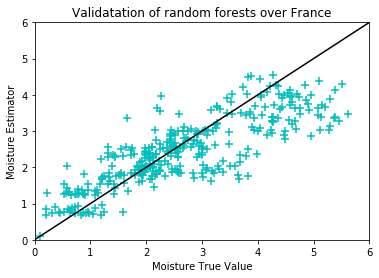

Mean Absolute Error: 0.564878719348329
Mean Squared Error: 0.5833235412719886
Root Mean Squared Error: 0.7637562053901681
Test score: R^2 = 0.655397


In [30]:
# plot
fig = plt.figure()
ax = plt.subplot()

plt.xlabel("Moisture True Value")

plt.ylabel("Moisture Estimator")
plt.title("Validatation of random forests over France")

x = np.linspace(0, 6,1000)

plt.xlim((0, 6)) # the range of x
plt.ylim((0, 6)) # the range of y

plt.plot(x, x, color="black") ##  adding the 1:1 line

p2 = plt.scatter(y, y_pred, marker = '+', color = 'c', label="RF Test score: $R^2$ = %.2f" % (regr_rf.score(X,y_pred)), s = 50)  

plt.show()


#print('Validation in France')
#print(regr_rf.score(X_train,y_train),regr_rf.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred))) 
print("Test score: R^2 = %f" % (regr_rf.score(X,y)))
